In [ ]:
## Predicting Synthetic social media activity data for trend and sentiment analysis ##


## 1. Problem definition: 
How can we identify spikes or drops in engagement, analyze changes in sentiment over time, build dashboards for digital trend tracking, and test algorithms for sentiment analysis or trend prediction

## 2. Goal: 
Our model is supposed to predict synthetic social media activity data for trend and sentiment analysis

## 3. Data: 
The data is downloaded from the Kaggle Social Media Engagement Dataset (https://www.kaggle.com/datasets/subashmaster0411/social-media-engagement-dataset)

## 4. Approach: ML models:-
"Logistic Regression": LogisticRegression(),  
"KNN": KNeighborsClassifier(),  
"Random Forest": RandomForestClassifier()
*RandomForest: RandomForestRegressor()

## 5. Deployment: 
**Our model will be used in practice to do the following**:

* Identify spikes or drops in engagement,
* Analyze changes in sentiment over time,
* Build dashboards for digital trend tracking

## 6. Evaluations Metrics:  
>If we can reach 95% accuracy at predicting whether or not there is a drop in engagement, and changes in sentiment over time.

## 7. Features:
This machine-generated dataset simulates social media engagement data across various metrics, including likes, shares, comments, 
impressions, sentiment scores, toxicity, and engagement growth. It is designed for analysis and visualization of trends, buzz frequency, 
public sentiment, and user behavior on digital platforms

## Preparing The Tools
We are going to use pandas, matplotlib, and numpy for Data analysis.

In [80]:
## Import all the tools we need
## Use regular EDA (Exploratory Data Analysis). and plotting libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from textblob import TextBlob
import tweepy
from sklearn.preprocessing import OneHotEncoder

## Models From Scikit-learn
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score 

In [81]:
df = pd.read_csv("Social-media-engagement-project/Social Media Engagement Dataset.csv")

## Exploring our data

In [82]:
## Let's view the data
df.head()

,post_id,timestamp,day_of_week,platform,user_id,location,language,text_content,hashtags,mentions,...,comments_count,impressions,engagement_rate,brand_name,product_name,campaign_name,campaign_phase,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate
0,kcqbs6hxybia,2024-12-09 11:26:15,Monday,Instagram,user_52nwb0a6,"Melbourne, Australia",pt,Just tried the Chromebook from Google. Best pu...,#Food,NaN,...,701,18991,0.19319,Google,Chromebook,BlackFriday,Launch,0.0953,-0.3672,19.1
1,vkmervg4ioos,2024-07-28 19:59:26,Sunday,Twitter,user_ucryct98,"Tokyo, Japan",ru,Just saw an ad for Microsoft Surface Laptop du...,"#MustHave, #Food","@CustomerService, @BrandCEO",...,359,52764,0.05086,Microsoft,Surface Laptop,PowerRelease,Post-Launch,0.1369,-0.4510,-42.6
2,memhx4o1x6yu,2024-11-23 14:00:12,Saturday,Reddit,user_7rrev126,"Beijing, China",ru,What's your opinion about Nike's Epic React? ...,"#Promo, #Food, #Trending",NaN,...,643,8887,0.45425,Nike,Epic React,BlackFriday,Post-Launch,0.2855,-0.4112,17.4
3,bhyo6piijqt9,2024-09-16 04:35:25,Monday,YouTube,user_4mxuq0ax,"Lagos, Nigeria",en,Bummed out with my new Diet Pepsi from Pepsi! ...,"#Reviews, #Sustainable","@StyleGuide, @BrandSupport",...,743,6696,0.42293,Pepsi,Diet Pepsi,LaunchWave,Launch,-0.2094,-0.0167,-5.5
4,c9dkiomowakt,2024-09-05 21:03:01,Thursday,Twitter,user_l1vpox2k,"Berlin, Germany",hi,Just tried the Corolla from Toyota. Absolutely...,"#Health, #Travel","@BrandSupport, @InfluencerName",...,703,47315,0.08773,Toyota,Corolla,LocalTouchpoints,Launch,0.6867,0.0807,38.8


## Getting all the information about our dataset. e.g 
*missing values, 

*missing data, 

*Non numerical values(strings)

*numericals columns

And then we clearnup the dataframe and a make a copy of it and use to train our models for prediction.

In [83]:
# Let's get a little information of what is happening in our large data.  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   post_id                  12000 non-null  object 
 1   timestamp                12000 non-null  object 
 2   day_of_week              12000 non-null  object 
 3   platform                 12000 non-null  object 
 4   user_id                  12000 non-null  object 
 5   location                 12000 non-null  object 
 6   language                 12000 non-null  object 
 7   text_content             12000 non-null  object 
 8   hashtags                 12000 non-null  object 
 9   mentions                 8059 non-null   object 
 10  keywords                 12000 non-null  object 
 11  topic_category           12000 non-null  object 
 12  sentiment_score          12000 non-null  float64
 13  sentiment_label          12000 non-null  object 
 14  emotion_type          

In [84]:
# Let's check if there are missing values b4 we visualize our dataset with plot.
df.isna().sum()

post_id                       0
timestamp                     0
day_of_week                   0
platform                      0
user_id                       0
location                      0
language                      0
text_content                  0
hashtags                      0
mentions                   3941
keywords                      0
topic_category                0
sentiment_score               0
sentiment_label               0
emotion_type                  0
toxicity_score                0
likes_count                   0
shares_count                  0
comments_count                0
impressions                   0
engagement_rate               0
brand_name                    0
product_name                  0
campaign_name                 0
campaign_phase                0
user_past_sentiment_avg       0
user_engagement_growth        0
buzz_change_rate              0
dtype: int64

Wow, there are a lot of missing values in the dataset. we'll take care of it before predicting with our model. 
Our data is a Time series data, because we using Timestamp to predict the future changes or trends.

In [85]:
## Let's check all the columns. 
df.columns

Index(['post_id', 'timestamp', 'day_of_week', 'platform', 'user_id',
       'location', 'language', 'text_content', 'hashtags', 'mentions',
       'keywords', 'topic_category', 'sentiment_score', 'sentiment_label',
       'emotion_type', 'toxicity_score', 'likes_count', 'shares_count',
       'comments_count', 'impressions', 'engagement_rate', 'brand_name',
       'product_name', 'campaign_name', 'campaign_phase',
       'user_past_sentiment_avg', 'user_engagement_growth',
       'buzz_change_rate'],
      dtype='object')

In [86]:
## Let's check the missing data in our dataset
df.isnull().sum()  ## if we add /len(df_tmp) is to assign some ratio or % when we divide our missing data by lenght of the dataframe (df.tmp).e.g df_tmp.ishull().sum./len(df_tmp)

post_id                       0
timestamp                     0
day_of_week                   0
platform                      0
user_id                       0
location                      0
language                      0
text_content                  0
hashtags                      0
mentions                   3941
keywords                      0
topic_category                0
sentiment_score               0
sentiment_label               0
emotion_type                  0
toxicity_score                0
likes_count                   0
shares_count                  0
comments_count                0
impressions                   0
engagement_rate               0
brand_name                    0
product_name                  0
campaign_name                 0
campaign_phase                0
user_past_sentiment_avg       0
user_engagement_growth        0
buzz_change_rate              0
dtype: int64

Wow, Our missing Values and missing data are in the same columns. And there are also a lot of missing Data in the dataset. we'll take care of it before predicting with our model.

In [87]:
## Let's find all the columns which contain strings. i.e non numerical 
for label, content in df.items():  
    if pd.api.types.is_string_dtype(content):  
        print(label)

post_id
timestamp
day_of_week
platform
user_id
location
language
text_content
hashtags
keywords
topic_category
sentiment_label
emotion_type
brand_name
product_name
campaign_name
campaign_phase


These are the columns which contains string, i.e they are not numeric

In [88]:
## Let's find how many numeric datatype(dtype) we have using pandas dypes.is.numeric as we did with srtinge
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

sentiment_score
toxicity_score
likes_count
shares_count
comments_count
impressions
engagement_rate
user_past_sentiment_avg
user_engagement_growth
buzz_change_rate


These are the numeric missings dataser columns, we will fill the missing numeric columns with some sort of values later on.

In [89]:
## Let's check out the dates in the timestamp column and plot with user_past_sentiment_avg uzing scatter plot
df.timestamp[:1000]

0      2024-12-09 11:26:15
1      2024-07-28 19:59:26
2      2024-11-23 14:00:12
3      2024-09-16 04:35:25
4      2024-09-05 21:03:01
              ...         
995    2025-03-23 21:42:24
996    2024-11-10 14:37:59
997    2024-10-08 14:22:56
998    2025-04-12 16:05:15
999    2024-12-16 15:19:14
Name: timestamp, Length: 1000, dtype: object

In [90]:
# Let's change or re-arrange the timestamp year in a yearly order. sorting 
# 1st let's see the 20 of our timestamp
df.timestamp.head(20)

0     2024-12-09 11:26:15
1     2024-07-28 19:59:26
2     2024-11-23 14:00:12
3     2024-09-16 04:35:25
4     2024-09-05 21:03:01
5     2024-07-28 03:21:09
6     2024-08-21 17:02:47
7     2025-01-27 16:09:54
8     2024-11-29 17:03:41
9     2025-02-27 23:21:02
10    2024-07-24 04:26:23
11    2024-05-26 13:04:10
12    2024-12-27 12:51:45
13    2024-09-29 19:20:58
14    2024-08-30 02:56:16
15    2025-03-08 19:17:54
16    2024-10-09 09:30:40
17    2024-06-27 05:16:23
18    2024-09-04 07:07:48
19    2024-05-18 16:33:11
Name: timestamp, dtype: object

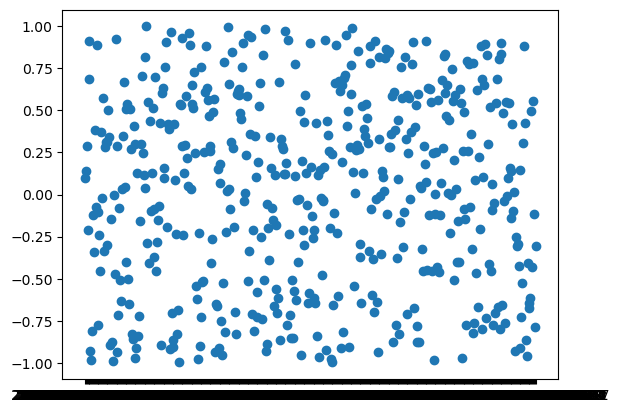

In [91]:
## Let's plot 1st 500 because the data is large.
fig, ax = plt.subplots()
ax.scatter(df["timestamp"][:500], df["user_past_sentiment_avg"][:500])
plt.show();

## Let's now Sort DataFrame by timestamp
**When working with time series data its always a good idea to sort it by date**..
It's always a good idea in time series event to use the pass date to make prediction about the future.

In [92]:
## Sort data frame in date order
df.sort_values(by=["timestamp"], inplace=True, ascending=True) ## (If we don't have implace=True we have to go by typing df = df.sort_value..... ascending will start from early dates)
df.timestamp.head(20)

6988     2024-05-01 01:04:04
2147     2024-05-01 01:35:53
9981     2024-05-01 02:24:32
6000     2024-05-01 04:21:58
1431     2024-05-01 04:39:36
6203     2024-05-01 04:57:30
11483    2024-05-01 05:47:38
4912     2024-05-01 05:56:58
8967     2024-05-01 06:08:47
7070     2024-05-01 06:16:01
2221     2024-05-01 07:06:43
4581     2024-05-01 08:28:04
7208     2024-05-01 08:51:10
7871     2024-05-01 09:28:09
10508    2024-05-01 09:47:03
3145     2024-05-01 10:25:33
8422     2024-05-01 11:43:39
10558    2024-05-01 11:49:11
4780     2024-05-01 12:46:24
10656    2024-05-01 12:58:09
Name: timestamp, dtype: object

In [93]:
## Let's add daytime parameters for the timestamp column, so that we decide whether to remove the column or not.

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second

In [94]:
df.head().T

,6988,2147,9981,6000,1431
post_id,f2cwealuvg9p,rx6kw7dl1hql,kzo4myed0f9j,dcn4gxvn0cnk,ae40vtfvawtf
timestamp,2024-05-01 01:04:04,2024-05-01 01:35:53,2024-05-01 02:24:32,2024-05-01 04:21:58,2024-05-01 04:39:36
day_of_week,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday
platform,YouTube,Twitter,Twitter,Reddit,Instagram
user_id,user_f2e0sgwi,user_23qq6msj,user_x8o6o3mx,user_8g3sp91m,user_nxcw2tat
location,"Rio de Janeiro, Brazil","Dubai, UAE","Barcelona, Spain","Tokyo, Japan","Sydney, Australia"
language,en,fr,ru,pt,zh
text_content,Feeling let down with my new Pixel Watch from ...,Attended the Apple CustomerFirst event yesterd...,Pepsi ValentinesDeals is subpar! Can't wait to...,Attended the Google LaunchWave event yesterday...,Super excited with my new Xbox Elite Controlle...
hashtags,"#Premium, #Lifestyle, #ProductLaunch","#Fashion, #Quality","#Tech, #SpecialOffer","#Sale, #Fashion",#Lifestyle
mentions,@TechHelp,"@InfluencerName, @ProductTeam",@BrandCEO,NaN,NaN


What we've done is, we've created minutes, seconds, hours, days, months, weeks, and year columns added to our dataframe. These features are not listed on our data dictionary,
but, because i want to share them with someone that is why i add them. With this information, we don't need timestamp anymore. so it will be removed

## Let's make a copy of the original DataFrame
We make a copy of the original data frame so that when we manipulate the copy, we've still got our original copy.

Let's call the dataframe we are going ro make "Temporary" (tmp)

In [95]:
df_tmp = df.copy()

This means that all changes we've made (and still going to make) are now saved in df_tmp, while we still keep our original data. If we need 
to confirm something from the original data frame we just need to type df.head()

## **Convert string to categories**
One way we can turn all of our data into numbers is by converting into pandas categories.

In [96]:
## Let's turn all of the stringe values into category values.
for lable, content in df_tmp.items():
     if pd.api.types.is_string_dtype(content):
         df_tmp[lable] = content.astype("category").cat.as_ordered()   ## as_ordered means to have them in them in alphabetical orders

In [97]:
## Let's check one of the string column.. e,g post_i
df_tmp.post_id.cat.categories

Index(['003s4ulm32tk', '003yqlh86w25', '005g54tmt26m', '005xp74npdxd',
       '0066x8nnmouc', '00dgsr345f4a', '00nnjh8656q0', '00pk8aa72o8x',
       '00tm11umhxi4', '00u9otx16xfc',
       ...
       'zz9pars0nqh1', 'zzan2x9vprno', 'zzcbxykefdn4', 'zzcslp4ic6tb',
       'zzi0ox29h687', 'zzk8v9tegf3j', 'zzkhe59qxu95', 'zzkznn0ilgk2',
       'zzpafpna0dr3', 'zzpwzzwupl6p'],
      dtype='object', length=12000)

In [98]:
## Let's confirm and check if the dataframe is now infor of numbers.
df_tmp.post_id.cat.codes

6988     4983
2147     9221
9981     6891
6000     4412
1431     3408
        ...  
1964     9470
5093     5409
2721    10935
4631     4235
1501     7748
Length: 12000, dtype: int16

Thanks to Pandas Categories (cat) we now have a way of accessing our our data in the form of numbers. 
But we still a bunch of missing data

Next is to fill all the missing data so as to build our machine learning model to predict the spikes or drops in engagement, analyze changes in sentiment over time.
But b4 we do that we have to save our data since we have make some changes on it and reimport it again. 
Instead of starting this dataframe all over again we can just save our manipulated or cleansed data to csv file and reimport it again them build our model

## Save Preprocess Data

In [99]:
import os

directory = "data/cleansed"
if not os.path.exists(directory):
    os.makedirs(directory)

df_tmp.to_csv(f"{directory}/train_tmp2.csv", index=False)

In [100]:
## Export cureent data frame.
df_tmp.to_csv("data/cleansed/train_tmp2.csv", 
              index=False)

In [101]:
pd.read_csv("data/cleansed/train_tmp2.csv")

,post_id,timestamp,day_of_week,platform,user_id,location,language,text_content,hashtags,mentions,...,campaign_phase,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate,year,month,day,hour,minute,second
0,f2cwealuvg9p,2024-05-01 01:04:04,Wednesday,YouTube,user_f2e0sgwi,"Rio de Janeiro, Brazil",en,Feeling let down with my new Pixel Watch from ...,"#Premium, #Lifestyle, #ProductLaunch",@TechHelp,...,Post-Launch,-0.0435,0.1599,-5.3,2024,5,1,1,4,4
1,rx6kw7dl1hql,2024-05-01 01:35:53,Wednesday,Twitter,user_23qq6msj,"Dubai, UAE",fr,Attended the Apple CustomerFirst event yesterd...,"#Fashion, #Quality","@InfluencerName, @ProductTeam",...,Post-Launch,0.0324,0.4368,-94.6,2024,5,1,1,35,53
2,kzo4myed0f9j,2024-05-01 02:24:32,Wednesday,Twitter,user_x8o6o3mx,"Barcelona, Spain",ru,Pepsi ValentinesDeals is subpar! Can't wait to...,"#Tech, #SpecialOffer",@BrandCEO,...,Launch,-0.7461,-0.4979,45.4,2024,5,1,2,24,32
3,dcn4gxvn0cnk,2024-05-01 04:21:58,Wednesday,Reddit,user_8g3sp91m,"Tokyo, Japan",pt,Attended the Google LaunchWave event yesterday...,"#Sale, #Fashion",NaN,...,Launch,-0.3028,-0.3483,-83.6,2024,5,1,4,21,58
4,ae40vtfvawtf,2024-05-01 04:39:36,Wednesday,Instagram,user_nxcw2tat,"Sydney, Australia",zh,Super excited with my new Xbox Elite Controlle...,#Lifestyle,NaN,...,Post-Launch,-0.0720,0.1482,-62.2,2024,5,1,4,39,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,sqhfrul2wsv6,2025-04-30 19:30:58,Wednesday,Twitter,user_0vaq421a,"Lyon, France",fr,Has anyone else experienced battery problems w...,#Trending,NaN,...,Post-Launch,0.5662,0.1429,96.7,2025,4,30,19,30,58
11996,gej9igxbsiln,2025-04-30 20:17:50,Wednesday,Facebook,user_b2j1umu9,"Mumbai, India",ru,Just tried the Coca-Cola Cherry from Coca-Cola...,"#ProductLaunch, #TrendAlert",NaN,...,Pre-Launch,0.4354,-0.4251,3.2,2025,4,30,20,17,50
11997,wspzh4jql6ij,2025-04-30 21:21:15,Wednesday,Facebook,user_gntgy40h,"São Paulo, Brazil",ar,My six months review of Pepsi Crystal Pepsi: R...,"#Lifestyle, #Trending, #Travel","@CustomerService, @TrendSetter",...,Post-Launch,0.1726,-0.3538,48.1,2025,4,30,21,21,15
11998,cvzunr9yxy96,2025-04-30 21:57:10,Wednesday,Facebook,user_yzpl0n9x,"Beijing, China",hi,So happy with my new Kindle from Amazon! Best ...,"#BestValue, #Lifestyle","@TrendSetter, @CelebrityName",...,Post-Launch,0.3524,-0.1554,-46.2,2025,4,30,21,57,10


## Fill Missing Values.
### Fills the numeric missing values first

In [102]:
## Check which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)   ## this will tell us which columns have 'Null' values

No numerical columns have missing values .. ok let's proceed

In [103]:
## Fill the numeric rows with the Median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            ## We have to add a binary column which wil tell us if the data is missing or not
            df_tmp[label+"is_missing"] = pd.isnull(content)
            ## Fill numberic missing values with median. (reason been that median is more roburst than mean
            df_tmp[label] = content.fillna(content.median())

### **Filling and turning categorical variables into numbers**

In [104]:
## Turn categorical variables in numbers and f\ill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        ## Add a binary column to indicate whether the sample has missing values
        df_tmp[label+"is_missing"] = pd.isnull(content)
        ## Turn categories into numbers and add+1
        df_tmp[label] = pd.Categorical(content).codes+1
        print(label)

post_id
timestamp
day_of_week
platform
user_id
location
language
text_content
hashtags
mentions
keywords
topic_category
sentiment_label
emotion_type
brand_name
product_name
campaign_name
campaign_phase


In [105]:
df_tmp.head().T

,6988,2147,9981,6000,1431
post_id,4984,9222,6892,4413,3409
timestamp,1,2,3,4,5
day_of_week,7,7,7,7,7
platform,5,4,4,3,2
user_id,4984,668,11068,2774,7967
location,24,7,1,31,29
language,3,5,9,8,10
text_content,3912,1085,10971,1330,11583
hashtags,2695,1344,3989,3447,2006
mentions,196,100,1,0,0


**now we got no more missing values in our dataframe**

Now that all of the data and our data frame have no missing values, we should be able to build our machine learning model. Remember, our goal is to predict selling prices.

In [106]:
columns_to_convert = ['post_id',
  'timestamp',
  'day_of_week',
  'platform',
  'user_id',
  'location',
  'language',
  'text_content',
  'hashtags',
  'mentions',
  'keywords',
  'topic_category',
  'sentiment_label',
  'emotion_type',
  'brand_name',
  'product_name',
  'campaign_name',
  'campaign_phase'
]
# Convert these columns from string to float
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # errors='coerce' will set invalid parsing to NaN

### 5: MODELLING

In [107]:
## Let's drop the plarform as we are going to use all other independent columns to predict the platform
## instantiate the model 

model = RandomForestRegressor(n_jobs=-1, 
                              random_state=42)
## Fit the model 
model.fit(df_tmp.drop("platform", axis=1), df_tmp["platform"])

RandomForestRegressor(n_jobs=-1, random_state=42)

In [108]:
model.score(df_tmp.drop("platform", axis=1), df_tmp["platform"])

0.8576831511790469

We can't really really rely on this above metrics? bcos the data is too large and we need let the metrics or model predict accurately 
by spliting the data

## **Splitting data into Train/Validation set**
Now to create oue own validation set, we want to split our data so that all the rows up to 2024 (let's use the timestamp up to 2024) the timestamp 2024 can be on the traning set. And all other rows can use on the validation set.

In [109]:
## Let's the sale year value.
df_tmp.timestamp.value_counts()

timestamp
3820     2
2948     2
11676    2
1        1
8003     1
        ..
4003     1
4004     1
4005     1
4006     1
11997    1
Name: count, Length: 11997, dtype: int64

We have 11,997 total timestamp. To split our data into Training and Validation set, let's interospect this timestamp column. 
And every column wil on validsation set. And every cplimn that's not = timestamp, will be on training set

In [110]:
## Split data into training and validation set.. 
df_val = df_tmp[df_tmp.timestamp == 2024]
df_train = df_tmp[df_tmp.timestamp != 2024]

len(df_val), len(df_train)

(1, 11999)

Now we have a validation set of 11573 and a Training set of 401125..

In [111]:
from sklearn.model_selection import train_test_split

x_train, y_train = df_train.drop("platform", axis=1), df_train.platform 
x_valid, y_valid = df_val.drop("platform", axis=1), df_val.platform 

x_train, x_test, y_train, y_test = train_test_split(  
    x_train, y_train,  # Use x_train and y_train here  
    test_size=0.2,  
    random_state=42,  
    shuffle=True  
)  

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((9599, 51), (9599,), (1, 51), (1,))

In [112]:
y_train, len(y_train)

(5577     5
 3627     4
 11853    1
 644      5
 11707    2
         ..
 9681     4
 5645     3
 1690     1
 3312     5
 10101    5
 Name: platform, Length: 9599, dtype: int8,
 9599)

Now, we have our data split into train and test split. 
it's time to build a machine learning model.
we'll train it (i.e., fine the patterns) on the training set.
And we"ll test it (i.e., Use the patterns) on the test set. in order to predict.
We are going to try 3 different machine learning models.
1. Logistics Regression (Dispite it's name, is a  Linear model for classification, rather than regression)
2. K-Nearest Neighbors Classifier
3. Random forest Classifier

In [113]:
## Let's put our models into a dictionary..
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

## Crearte a function to fit and score the models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fit and evaluate given machime learning models
    
    Parameters:  
    model: a dict of different scikit-learn machine learning models.  
    x_train: training data (no labels)  
    x_test: testing data (no labels)  
    y_train: training labels  
    y_test: test labels  
    """
    ## Let's set our seed to 42
    np.random.seed(42)

    # Make a dict syntax to help model scores  
    model_scores = {}

    # Loop through models  
    for name, model in models.items():  
        # Fit the model to the data  
        model.fit(x_train, y_train)  
        
        # Evaluate the model and append its score to model_scores  
        model_scores[name] = model.score(x_test, y_test)  
        
    return model_scores

In [114]:
#let's fit the model and see how these models perform
models_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
models_scores

C:\Users\PC\Desktop\project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.21291666666666667,
 'KNN': 0.20458333333333334,
 'Random Forest': 0.21708333333333332}

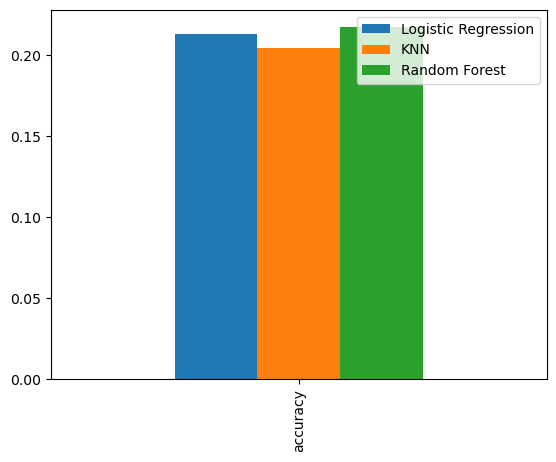

In [115]:
## Compare visually (assuming you want to show it to somebody)
# Create a DataFrame to compare model scores

model_compare = pd.DataFrame(models_scores, index=["accuracy"])  
model_compare.plot.bar();
plt.show()

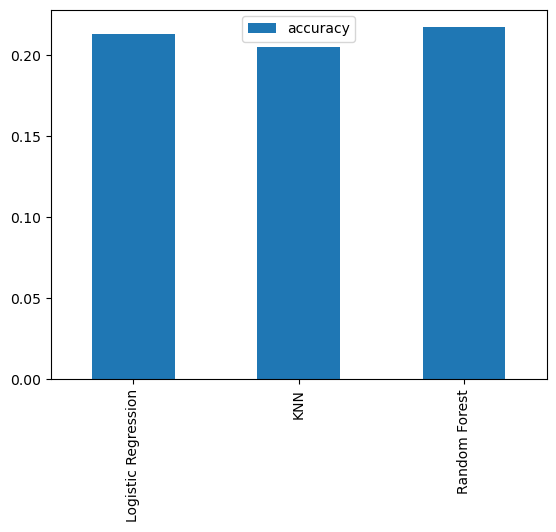

In [116]:
## Let's use transpose to see how it looks.

model_compare = pd.DataFrame(models_scores, index=["accuracy"])  
model_compare.T.plot.bar();
plt.show()

This means that RandomForestClassifier will be more accurate to help us predict drops in engagement, analyz sentiment etc

Now we've got a baseline model... And a model's first prediction aren't always what we should base our next steps off..
What should we do..
Let's look at the following

* Hyperparameter tuning
* Feature importance
* Confussion Matrix
* Cross validation
* Precission
* Recall
* F1 score
* Classification report
* ROC curve
* AUC curve (Area under curve)

## **Hyperparameter Tuning with RandomizedSearchCV**
We are going to tune: 
* RandomForestClassifier()
Since RandomForestClassifier is the only one with higher accuracy we are going to focus on fine tuning it with RandomizedSearchCV

In [117]:
## Create a Hperparameter Grid for Logistic Regression

## Create a Hyperparameter Grid for RandomForestClassifier.
rf_grid ={"n_estimators": np.arange(10, 1000, 50),
          "max_depth" : [None, 3, 5, 10],
          "min_samples_split" : np.arange(2, 20, 2),
          "min_samples_leaf" : np.arange(1, 20, 2)}

Now we've got a Hyperparameter grid set-up for each of our models, let's tune them using RandomizedSearchCV..

In [118]:
## Set seed.
np.random.seed(42)

## setup random hyperparameters search for RandomForestClassifier.
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions=rf_grid,
                       cv=5,
                       n_iter=20,
                       verbose=True)

## Fit Random hyperparameter search for RandomForestClassifier
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [119]:
## fine the best hyperparameters..
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [120]:
## Let`'s evaluate the randomized search random forest classifier model
rs_rf.score(x_test, y_test)

0.205

## **Building an Evaluation Function**

In [121]:
## Let's Create an evaluation function (the competition we are working uses RMSLE (root mean squared log error))
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def  rmsle(y_test, y_preds):
    """
    calculate root mean squared log error between predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

## Create funtion to Evaluate Model on a few different levels

def  show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

## **Testing our Model on Subset( i.e To Tune the Hyperparameters)**

In [122]:
len(x_train)

9599

In [123]:
## Let's test our model

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                             max_samples=None)

## Cutting down on the mass number of samples each estimator can see improves training time.
model.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [124]:
show_scores(model)

C:\Users\PC\Desktop\project_1\env\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


{'Training MAE': 0.4578716532972184,
 'Valid MAE': 1.98,
 'Training RMSLE': 0.16743651204884466,
 'Training R^2': 0.8570914964217093,
 'Valid R^2': nan}

## **Train a Model with best Hyperparameters**

In [125]:
%%time

## Most ideal Hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.6,
                                   n_jobs=-1,
                                   max_samples=None)
## Fit the model
ideal_model.fit(x_train, y_train)

CPU times: total: 12.5 s
Wall time: 3.99 s


RandomForestRegressor(max_features=0.6, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [126]:
## Scores for ideal_model (trained on all the data)
show_scores(ideal_model)

C:\Users\PC\Desktop\project_1\env\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


{'Training MAE': 0.7015825477520984,
 'Valid MAE': 1.9561166698153922,
 'Training RMSLE': 0.24584833761413458,
 'Training R^2': 0.6613809522134131,
 'Valid R^2': nan}

### **Let's make Predictions on Test Data**

In [127]:
## Import the test data from our Bulldozer price prediction project from our csv file.
df_test = pd.read_csv("data/cleansed/train_tmp2.csv",
                      low_memory=False,
                      parse_dates=['timestamp'])

## lets see our test data head..
df_test.head()

,post_id,timestamp,day_of_week,platform,user_id,location,language,text_content,hashtags,mentions,...,campaign_phase,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate,year,month,day,hour,minute,second
0,f2cwealuvg9p,2024-05-01 01:04:04,Wednesday,YouTube,user_f2e0sgwi,"Rio de Janeiro, Brazil",en,Feeling let down with my new Pixel Watch from ...,"#Premium, #Lifestyle, #ProductLaunch",@TechHelp,...,Post-Launch,-0.0435,0.1599,-5.3,2024,5,1,1,4,4
1,rx6kw7dl1hql,2024-05-01 01:35:53,Wednesday,Twitter,user_23qq6msj,"Dubai, UAE",fr,Attended the Apple CustomerFirst event yesterd...,"#Fashion, #Quality","@InfluencerName, @ProductTeam",...,Post-Launch,0.0324,0.4368,-94.6,2024,5,1,1,35,53
2,kzo4myed0f9j,2024-05-01 02:24:32,Wednesday,Twitter,user_x8o6o3mx,"Barcelona, Spain",ru,Pepsi ValentinesDeals is subpar! Can't wait to...,"#Tech, #SpecialOffer",@BrandCEO,...,Launch,-0.7461,-0.4979,45.4,2024,5,1,2,24,32
3,dcn4gxvn0cnk,2024-05-01 04:21:58,Wednesday,Reddit,user_8g3sp91m,"Tokyo, Japan",pt,Attended the Google LaunchWave event yesterday...,"#Sale, #Fashion",NaN,...,Launch,-0.3028,-0.3483,-83.6,2024,5,1,4,21,58
4,ae40vtfvawtf,2024-05-01 04:39:36,Wednesday,Instagram,user_nxcw2tat,"Sydney, Australia",zh,Super excited with my new Xbox Elite Controlle...,#Lifestyle,NaN,...,Post-Launch,-0.0720,0.1482,-62.2,2024,5,1,4,39,36


In [128]:
## Make prediction on x_train

test_preds = ideal_model.predict(x_train)

In [129]:
test_preds

array([3.77080166, 3.14695223, 2.18769286, ..., 2.0340295 , 4.11358492,
       4.00893745])

In [130]:
len(test_preds)

9599

## Feature importance
Feature importance seems to figure out which different attribute of the data where MOST important whe it c
omes to predicting the target variables (SalePrice)

In [144]:
# 1. Define your features
features = [
    'buzz_change_rate', 'user_engagement_growth', 'text_content', 'comments_count',
    'user_past_sentiment_avg', 'toxicity_score', 'shares_count', 'keywords',
    'hashtags', 'sentiment_score', 'likes_count', 'impressions', 'engagement_rate',
    'second', 'minute', 'product_name', 'location'
]

# 2. Train your model here (assuming you've already done this)
# model.fit(train_X, train_y)

# 3. Retrieve feature importances
importances = model.feature_importances_

# 4. Make sure the length matches
print("Number of features:", len(features))
print("Number of importance scores:", len(importances))

Number of features: 17
Number of importance scores: 51


In [131]:
## Fine feature importance of our best model
ideal_model.feature_importances_  # numpy array of importance scores

array([0.04569574, 0.04062728, 0.01413016, 0.04634118, 0.02836572,
       0.01717348, 0.04187421, 0.04175801, 0.02669927, 0.04082055,
       0.01213955, 0.04145933, 0.00210739, 0.01132992, 0.04117281,
       0.04227756, 0.04092114, 0.04233696, 0.03746335, 0.03441104,
       0.01544005, 0.03310798, 0.02644386, 0.00616336, 0.04121667,
       0.04205211, 0.0450108 , 0.0007602 , 0.01425197, 0.02920363,
       0.02811027, 0.03422277, 0.03350547, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00140622, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [189]:
# Let's see the columns used in X_train
x_train.columns.tolist()

['post_id',
 'timestamp',
 'day_of_week',
 'user_id',
 'location',
 'language',
 'text_content',
 'hashtags',
 'mentions',
 'keywords',
 'topic_category',
 'sentiment_score',
 'sentiment_label',
 'emotion_type',
 'toxicity_score',
 'likes_count',
 'shares_count',
 'comments_count',
 'impressions',
 'engagement_rate',
 'brand_name',
 'product_name',
 'campaign_name',
 'campaign_phase',
 'user_past_sentiment_avg',
 'user_engagement_growth',
 'buzz_change_rate',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second',
 'post_idis_missing',
 'timestampis_missing',
 'day_of_weekis_missing',
 'platformis_missing',
 'user_idis_missing',
 'locationis_missing',
 'languageis_missing',
 'text_contentis_missing',
 'hashtagsis_missing',
 'mentionsis_missing',
 'keywordsis_missing',
 'topic_categoryis_missing',
 'sentiment_labelis_missing',
 'emotion_typeis_missing',
 'brand_nameis_missing',
 'product_nameis_missing',
 'campaign_nameis_missing',
 'campaign_phaseis_missing']

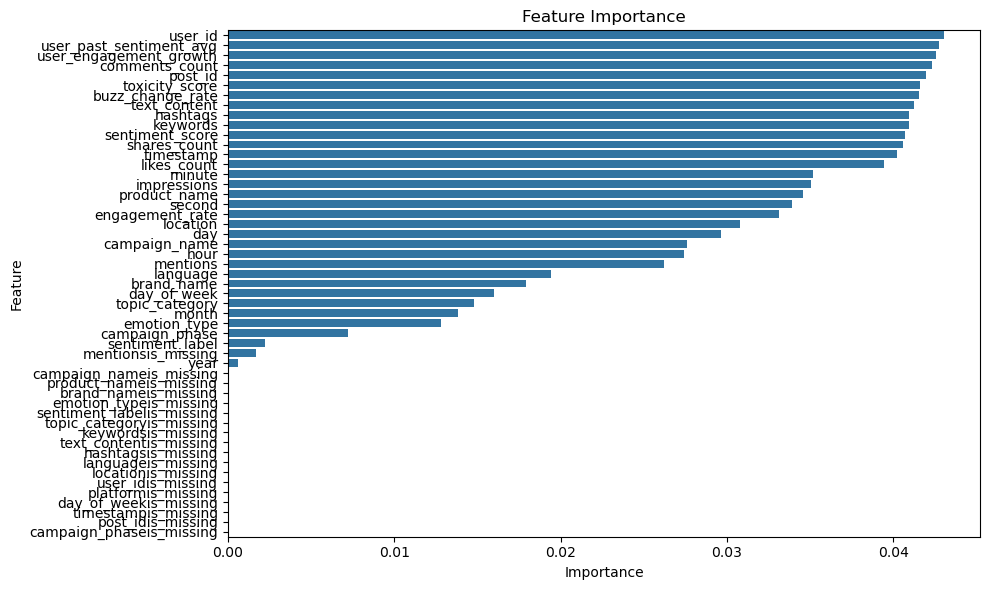

In [160]:
## Let's plot feature importances... 
# Let's add one more tool.. 

import seaborn as sns

features = x_train.columns.tolist() ## This will help ensure that the features list above exactly matches the features we are going to use to train our model.

# Create a DataFrame with features and their importance
feat_df_tmp = pd.DataFrame({'feature': features, 'importance': importances})

# Sort by importance descending
feat_df_tmp = feat_df_tmp.sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feat_df_tmp)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

These are features influencing the drops in engagement, changes in sentiment over time, and sentiment trend.. 

Let's now  build dashboards for digital trend tracking, and test algorithms for the above problems we are predicting

## Predicting Synthetic social media activity data for trend and sentiment analysis ##

**1. Predicting drops in engagement**

**2. Analyzing changes in sentiment over time**
   
**3. Building dashboards for digital trend tracking**
   
**4. Testing algorithms for sentiment analysis or trend prediction**

## 1. Predicting drops in engagement

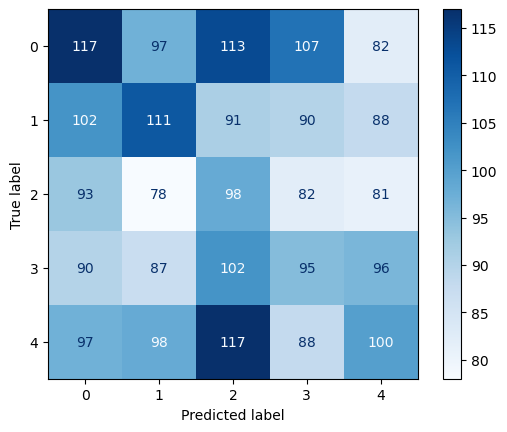

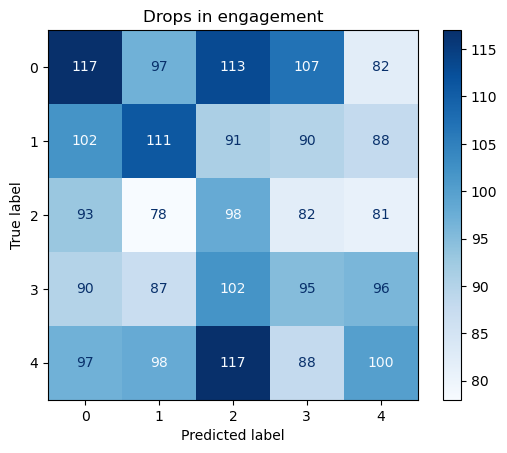

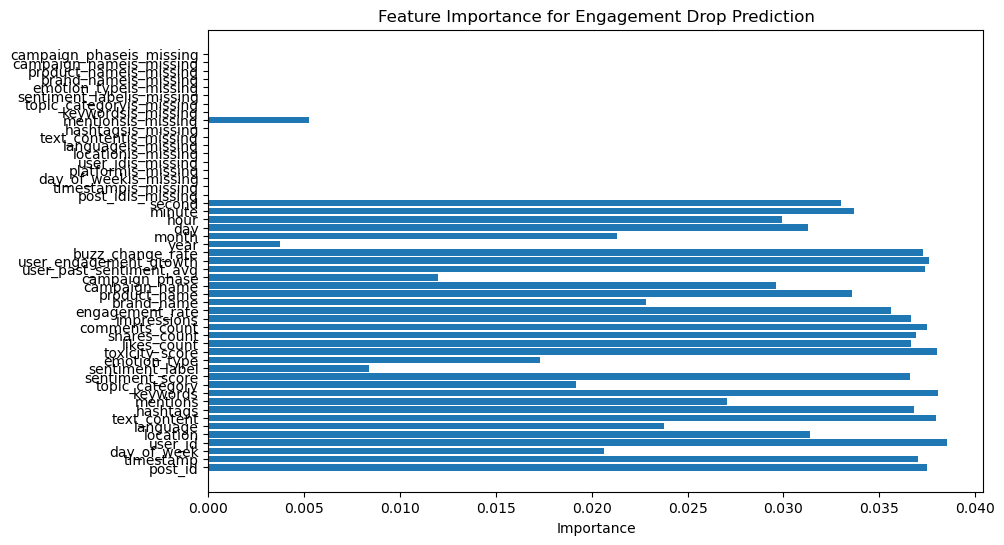

In [173]:
## Let's import some tools we need for these predictions.. 

import matplotlib.dates as mdates
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Let's be sure we have Converted timestamp to a datetime if we have already no problem
df_tmp['timestamp'] = pd.to_datetime(df_tmp['timestamp'])

# Let's Create additional time-based features if needed
df_tmp['day_of_week'] = df_tmp['timestamp'].dt.dayofweek
df_tmp['hour'] = df_tmp['timestamp'].dt.hour

# Sort data by timestamp
df_tmp = df_tmp.sort_values('timestamp')

# Let's assume there was a shift in previous likes to compare
df_tmp['prev_likes'] = df_tmp['likes_count'].shift(1)

# Calculate percentage change
df_tmp['likes_pct_change'] = (df_tmp['likes_count'] - df_tmp['prev_likes']) / df_tmp['prev_likes']

# Define drop condition (threshold - e.g., >20% decrease)
drop_threshold = -0.2
df_tmp['engagement_drop'] = (df_tmp['likes_pct_change'] <= drop_threshold).astype(int)

# Drop the first row with NaN shift
df_tmp = df_tmp.dropna(subset=['prev_likes'])

# Retrieve exact feature columns we are going to use in model training
features = x_train.columns.tolist()

X = df_tmp[features]
y = df_tmp['engagement_drop']

# Split data into training and testing based on timestamp
train_ratio = 0.8
split_idx = int(len(df_tmp) * train_ratio)

train_X = X.iloc[:split_idx]
train_y = y.iloc[:split_idx]
test_X = X.iloc[split_idx:]
test_y = y.iloc[split_idx:]

## Let's fit our model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Let's Predictions
preds = model.predict(x_test)

# Let's Evaluation
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
disp.plot(cmap=plt.cm.Blues)
plt.title('Drops in engagement')
plt.show();

# Feature Importance
feature_importances = model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(features, feature_importances)
plt.xlabel('Importance')
plt.title('Feature Importance for Engagement Drop Prediction')
plt.show();

## 2. Analyzing changes in sentiment over time

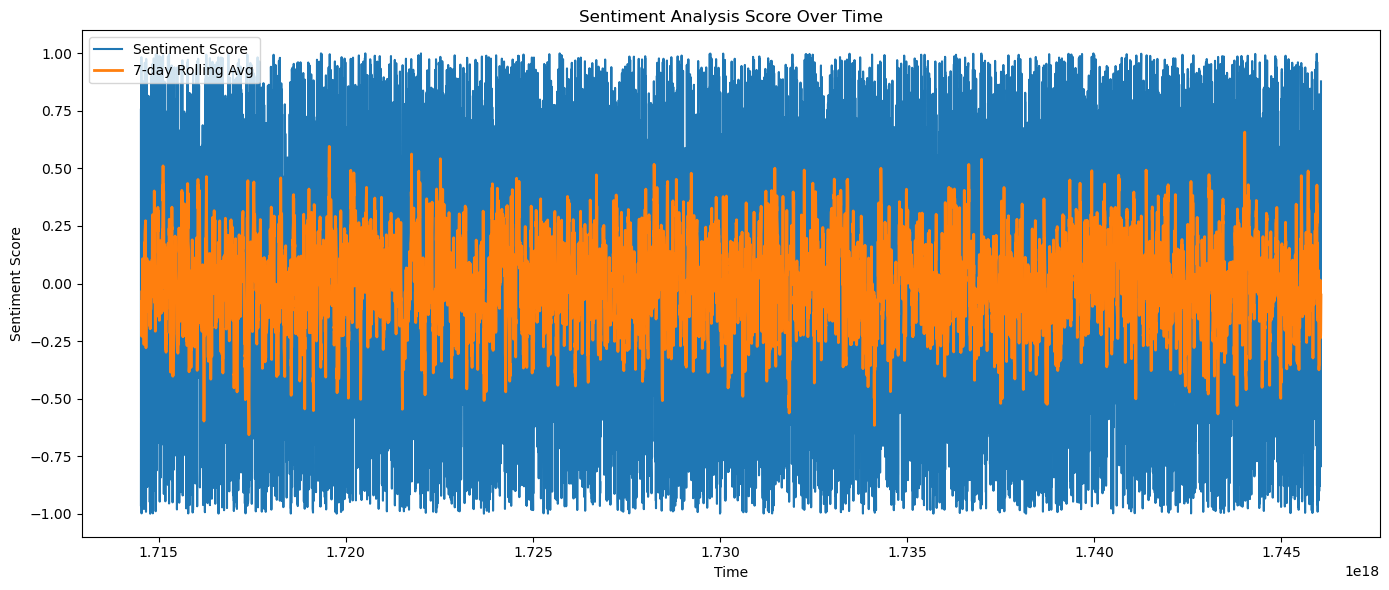

In [174]:
# Rolling average of sentiment_score for trend analysis
df['sentiment_rolling'] = df['sentiment_score'].rolling(window=10).mean()

plt.figure(figsize=(14,6))
plt.plot(df['timestamp'], df['sentiment_score'], label='Sentiment Score')
plt.plot(df['timestamp'], df['sentiment_rolling'], label='7-day Rolling Avg', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis Score Over Time')
plt.legend()
plt.tight_layout()
plt.show()

## 3. Building dashboards for digital trend tracking

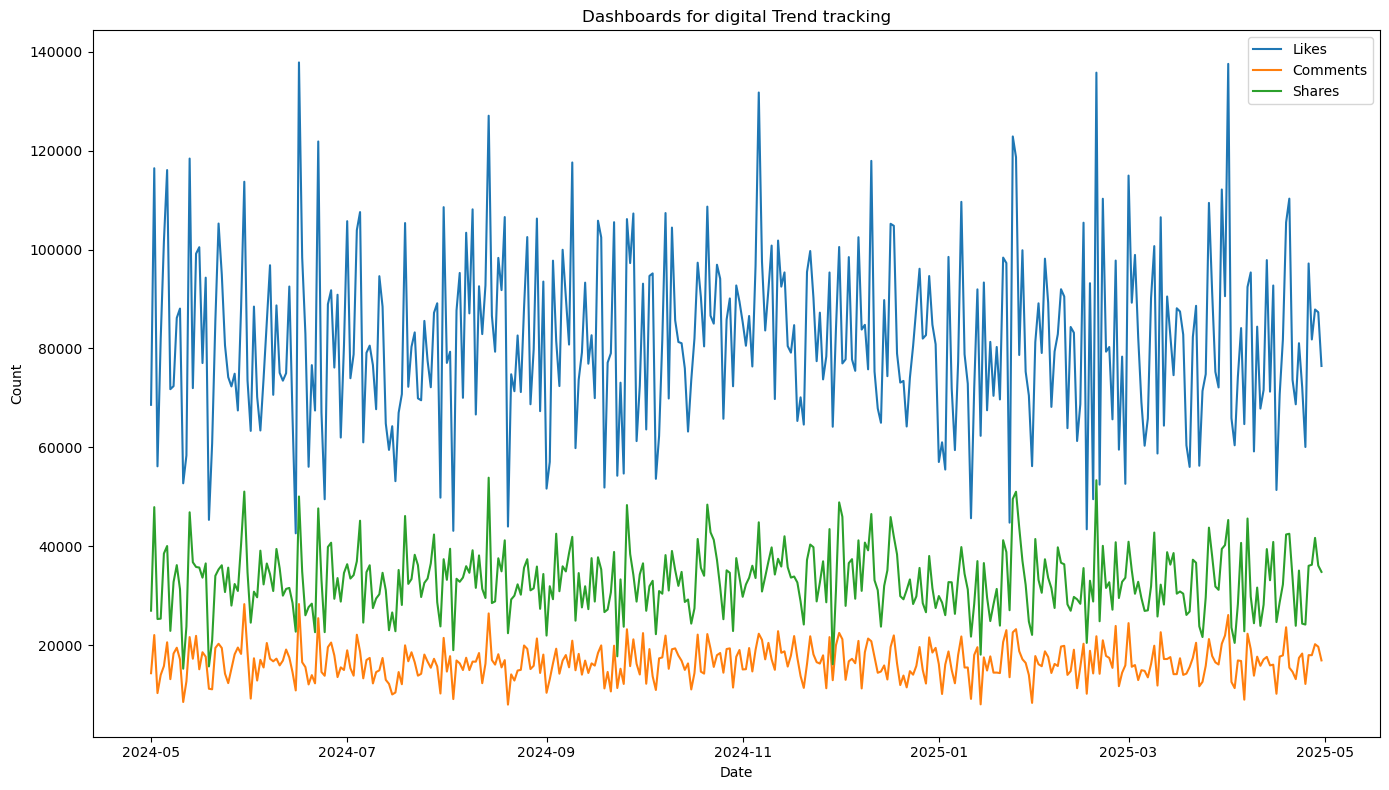

In [171]:
# Convert 'timestamp' to datetime if it's not already
df_tmp['timestamp'] = pd.to_datetime(df_tmp['timestamp'], errors='coerce')

df_tmp['date'] = df_tmp['timestamp'].dt.date

# Aggregate daily metrics
df_tmp['date'] = df_tmp['timestamp'].dt.date

daily_metrics = df_tmp.groupby('date').agg({
    'likes_count': 'sum',
    'comments_count': 'sum',
    'shares_count': 'sum',
    'impressions': 'sum',
    'engagement_rate': 'mean'
}).reset_index()

# Plot trends
import seaborn as sns

plt.figure(figsize=(14,8))
sns.lineplot(data=daily_metrics, x='date', y='likes_count', label='Likes')
sns.lineplot(data=daily_metrics, x='date', y='comments_count', label='Comments')
sns.lineplot(data=daily_metrics, x='date', y='shares_count', label='Shares')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Dashboards for digital Trend tracking')
plt.legend()
plt.tight_layout()
plt.show()

# Similar plots can be created for impressions and engagement rate